## Problem Statement
* Try improving the model and re-code the program from scratch without looking too much at this source code
* Write up a summary explaining how your program works. 
(Emotion Detection Using Tensorflow and Fer2013 dataset)

## Importing the llibraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as k

## Mount the drive and get access to the dataset from the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
num_classes = 7
img_width = 48
img_height = 48

In [7]:
data.shape

(35887, 3)

In [8]:
data.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [9]:
X = data['pixels']
y = data['emotion']

## Dataset preprocessing and splitting the dataset into Train and Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [11]:
X_train_new = []
for i in X_train:
    X_train_new.append([int(j) for j in i.split()])

In [12]:
X_train_new = np.array(X_train_new)/255.0

In [13]:
X_test_new = []
for i in X_test:
    X_test_new.append([int(j) for j in i.split()])

In [14]:
X_test_new = np.array(X_test_new)/255.0

In [15]:
X_train_new = X_train_new.reshape(X_train_new.shape[0], img_width, img_height, 1)
X_test_new = X_test_new.reshape(X_test_new.shape[0], img_width, img_height, 1)

In [16]:
X_test_new.shape

(3589, 48, 48, 1)

In [17]:
X_train_new = X_train_new.astype('float32')
X_test_new = X_test_new.astype('float32')

In [18]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

## Data Augmentation

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train_new)

## Building the model

Importing required lib's/packages

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten,Dropout, MaxPooling2D, Activation, BatchNormalization, InputLayer
from tensorflow.keras import regularizers

In [24]:
tf.random.set_seed(42)

model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
epochs = 60
batch_size = 64

### Training the model

In [31]:
history = model.fit(datagen.flow(X_train_new, y_train), epochs=60, batch_size=64,validation_data=(X_test_new,y_test))

Epoch 1/60
1010/1010 [==============================] - 76s 44ms/step - loss: 8.8080 - accuracy: 0.2069 - val_loss: 7.5986 - val_accuracy: 0.2708
Epoch 2/60
1010/1010 [==============================] - 43s 43ms/step - loss: 6.6987 - accuracy: 0.2421 - val_loss: 5.3940 - val_accuracy: 0.3413
Epoch 3/60
1010/1010 [==============================] - 43s 43ms/step - loss: 4.7781 - accuracy: 0.2925 - val_loss: 3.7688 - val_accuracy: 0.3909
Epoch 4/60
1010/1010 [==============================] - 43s 42ms/step - loss: 3.4521 - accuracy: 0.3577 - val_loss: 2.8269 - val_accuracy: 0.4486
Epoch 5/60
1010/1010 [==============================] - 43s 43ms/step - loss: 2.7357 - accuracy: 0.4050 - val_loss: 2.4081 - val_accuracy: 0.4611
Epoch 6/60
1010/1010 [==============================] - 43s 42ms/step - loss: 2.2744 - accuracy: 0.4479 - val_loss: 2.1128 - val_accuracy: 0.4762
Epoch 7/60
1010/1010 [==============================] - 43s 42ms/step - loss: 2.0206 - accuracy: 0.4762 - val_loss: 1.8884 -

## Plotting the loss and accuracy curves

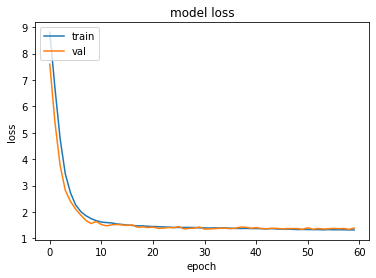

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

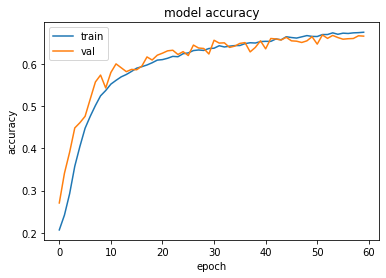

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
model.evaluate(X_test_new,y_test)

113/113 [==============================] - 2s 15ms/step - loss: 1.3945 - accuracy: 0.6662


[1.3944731950759888, 0.6662023067474365]

# Summary
* **The demo in the module 7** if we train the model for few more epochs the models gets overfitted. It can be due to less number of images
* So to improve the model performance we need to add the regualrizers, Dropout and Increase the number of images.
* For increasing the number of images we use the Image Data Generator class in keras. This class helps us to increase the images by rotating, shifting, zooming, flipping them.
* Regularization forces the model weights to take smaller values.
* Dropout is used to freeze some of the nodes during the training process. The nodes are select randomly for every epoch.
* All these techniques are implemented in the model above.
* Download the dataset and upload that to the drive. Load the dataset and preprocess it.
* Now split the dataset into train and test and so the rescaling and reshaping for the images.
* Augment the images using the Image Data Generator class.
* Now build the model. I tried a couple of models and this model suits the best for the given dataset. In order to avoid overfitting I used dropout, regularizers in the model.
* Compile the model using adam optimizer and change the learning rate to 0.0001, loss as categorical crossentropy and accuracy as metrics.
* Visualize the training and loss curves and evaluate the model using the test dataset.